In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [47]:
from sklearn.datasets import load_wine
vine = load_wine()
df = pd.DataFrame(vine.data, columns=vine.feature_names)
df.head()
df.shape
df.isnull().sum().sum()
X1 = df
y1 = pd.Series(vine.target)

In [48]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X1,y1,test_size=0.20,shuffle=True, random_state=2)

In [49]:
from keras.models import Sequential

ann = Sequential()

In [50]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer

ann.add(InputLayer(input_shape=(13,)))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(14, activation='relu'))
ann.add(Dense(13, activation='softmax'))

In [51]:
from tensorflow.keras import optimizers

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
ann.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

clf = ann.fit(X2_train, y2_train, batch_size=8, verbose=2, epochs=100, validation_data=(X2_test, y2_test))

Epoch 1/100
18/18 - 1s - loss: 14.8471 - accuracy: 0.3873 - val_loss: 3.8732 - val_accuracy: 0.2500 - 945ms/epoch - 52ms/step
Epoch 2/100
18/18 - 0s - loss: 1.5739 - accuracy: 0.5352 - val_loss: 0.9643 - val_accuracy: 0.7222 - 92ms/epoch - 5ms/step
Epoch 3/100
18/18 - 0s - loss: 0.8948 - accuracy: 0.6197 - val_loss: 0.5748 - val_accuracy: 0.7222 - 71ms/epoch - 4ms/step
Epoch 4/100
18/18 - 0s - loss: 0.7616 - accuracy: 0.6408 - val_loss: 0.4924 - val_accuracy: 0.7500 - 76ms/epoch - 4ms/step
Epoch 5/100
18/18 - 0s - loss: 0.8583 - accuracy: 0.5282 - val_loss: 0.6949 - val_accuracy: 0.6667 - 193ms/epoch - 11ms/step
Epoch 6/100
18/18 - 0s - loss: 0.8016 - accuracy: 0.6056 - val_loss: 0.8008 - val_accuracy: 0.6389 - 108ms/epoch - 6ms/step
Epoch 7/100
18/18 - 0s - loss: 0.7684 - accuracy: 0.5986 - val_loss: 0.5238 - val_accuracy: 0.7222 - 74ms/epoch - 4ms/step
Epoch 8/100
18/18 - 0s - loss: 0.7425 - accuracy: 0.6479 - val_loss: 0.4956 - val_accuracy: 0.7778 - 69ms/epoch - 4ms/step
Epoch 9/10

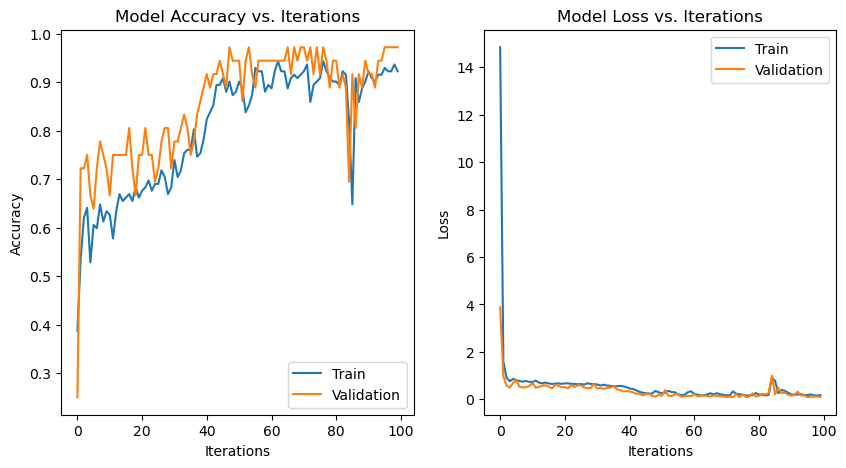

In [52]:
import matplotlib.pyplot as plt

figures, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(clf.history['accuracy'])
axes[0].plot(clf.history['val_accuracy'])
axes[0].set_title('Model Accuracy vs. Iterations')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Iterations')
axes[0].legend(['Train', 'Validation'], loc='lower right')

axes[1].plot(clf.history['loss'])
axes[1].plot(clf.history['val_loss'])
axes[1].set_title('Model Loss vs. Iterations')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Iterations')
axes[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [54]:
print(ann.evaluate(X2_test, y2_test))

2/2 [==============================] - 0s 4ms/step - loss: 0.1017 - accuracy: 0.9722
[0.10174504667520523, 0.9722222089767456]
